In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/flying-object-dataset/UAV_Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1246.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1342.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1743.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1370.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1007.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1492.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1083.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1291.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1358.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1368.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1495.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_1390.jpg
/kaggle/input/flying-object-dataset/UAV_Dataset/Helicopter/HELI_C1_790.jpg
/kaggle/input

In [6]:
dirname

'/kaggle/input/flying-object-dataset/UAV_Dataset/Aeroplane'

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [30]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# normalizing 
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),      
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Creating dataset for all classes
dataset = datasets.ImageFolder(root='/kaggle/input/flying-object-dataset/UAV_Dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
 
for images, labels in dataloader:
    print(images.shape, labels.shape)  


torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size

In [31]:
dataloader

In [37]:
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 50


In [38]:
class Generator(nn.Module):
	def __init__(self, latent_dim):
		super(Generator, self).__init__()

		self.model = nn.Sequential(
			nn.Linear(latent_dim, 128 * 8 * 8),
			nn.ReLU(),
			nn.Unflatten(1, (128, 8, 8)),
			nn.Upsample(scale_factor=2),
			nn.Conv2d(128, 128, kernel_size=3, padding=1),
			nn.BatchNorm2d(128),
			nn.ReLU(),
			nn.Upsample(scale_factor=2),
			nn.Conv2d(128, 64, kernel_size=3, padding=1),
			nn.BatchNorm2d(64),
			nn.ReLU(),
			nn.Conv2d(64, 3, kernel_size=3, padding=1),
			nn.Tanh()
		)

	def forward(self, z):
		img = self.model(z)
		return img


In [39]:
class Discriminator(nn.Module):
	def __init__(self):
		super(Discriminator, self).__init__()

		self.model = nn.Sequential(
		nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),
		nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
		nn.ZeroPad2d((0, 1, 0, 1)),
		nn.BatchNorm2d(64),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),
		nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
		nn.BatchNorm2d(128),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),
		nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
		nn.BatchNorm2d(256),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),
		nn.Flatten(),
		nn.Linear(256 * 5 * 5, 1),
		nn.Sigmoid()
	)

	def forward(self, img):
		validity = self.model(img)
		return validity

In [40]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_Generator = optim.Adam(generator.parameters()\
						, lr=lr, betas=(beta1, beta2))
optimizer_Descriminator = optim.Adam(discriminator.parameters()\
						, lr=lr, betas=(beta1, beta2))


Epoch [1/50]						Batch 100/128 Discriminator Loss: 0.6377 Generator Loss: 1.1747
Epoch [2/50]						Batch 100/128 Discriminator Loss: 0.3473 Generator Loss: 1.7463
Epoch [3/50]						Batch 100/128 Discriminator Loss: 0.4957 Generator Loss: 1.3541
Epoch [4/50]						Batch 100/128 Discriminator Loss: 0.6911 Generator Loss: 1.2796
Epoch [5/50]						Batch 100/128 Discriminator Loss: 0.5148 Generator Loss: 1.5350
Epoch [6/50]						Batch 100/128 Discriminator Loss: 0.5775 Generator Loss: 1.1336
Epoch [7/50]						Batch 100/128 Discriminator Loss: 0.6169 Generator Loss: 1.7383
Epoch [8/50]						Batch 100/128 Discriminator Loss: 0.5633 Generator Loss: 1.1756
Epoch [9/50]						Batch 100/128 Discriminator Loss: 0.5938 Generator Loss: 1.2502
Epoch [10/50]						Batch 100/128 Discriminator Loss: 0.5770 Generator Loss: 1.2090


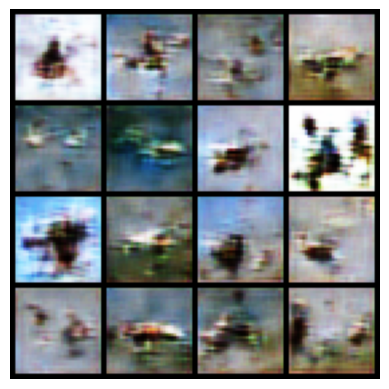

Epoch [11/50]						Batch 100/128 Discriminator Loss: 0.4776 Generator Loss: 1.5304
Epoch [12/50]						Batch 100/128 Discriminator Loss: 0.5571 Generator Loss: 1.3196
Epoch [13/50]						Batch 100/128 Discriminator Loss: 0.2372 Generator Loss: 1.8084
Epoch [14/50]						Batch 100/128 Discriminator Loss: 0.4419 Generator Loss: 2.4431
Epoch [15/50]						Batch 100/128 Discriminator Loss: 0.6104 Generator Loss: 1.0080
Epoch [16/50]						Batch 100/128 Discriminator Loss: 0.5863 Generator Loss: 1.0256
Epoch [17/50]						Batch 100/128 Discriminator Loss: 0.5049 Generator Loss: 1.1193
Epoch [18/50]						Batch 100/128 Discriminator Loss: 0.3865 Generator Loss: 1.4513
Epoch [19/50]						Batch 100/128 Discriminator Loss: 0.7130 Generator Loss: 0.9560
Epoch [20/50]						Batch 100/128 Discriminator Loss: 0.5573 Generator Loss: 1.3541


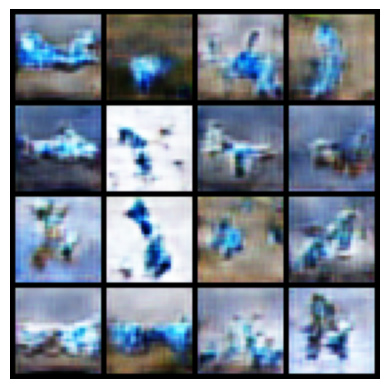

Epoch [21/50]						Batch 100/128 Discriminator Loss: 0.4427 Generator Loss: 1.8435
Epoch [22/50]						Batch 100/128 Discriminator Loss: 0.5444 Generator Loss: 1.3819
Epoch [23/50]						Batch 100/128 Discriminator Loss: 0.7466 Generator Loss: 1.4218
Epoch [24/50]						Batch 100/128 Discriminator Loss: 0.5328 Generator Loss: 1.0476
Epoch [25/50]						Batch 100/128 Discriminator Loss: 0.7035 Generator Loss: 1.3060
Epoch [26/50]						Batch 100/128 Discriminator Loss: 0.5661 Generator Loss: 1.1109
Epoch [27/50]						Batch 100/128 Discriminator Loss: 0.5801 Generator Loss: 1.3996
Epoch [28/50]						Batch 100/128 Discriminator Loss: 0.5938 Generator Loss: 0.6532
Epoch [29/50]						Batch 100/128 Discriminator Loss: 0.3600 Generator Loss: 1.3442
Epoch [30/50]						Batch 100/128 Discriminator Loss: 0.3228 Generator Loss: 1.5693


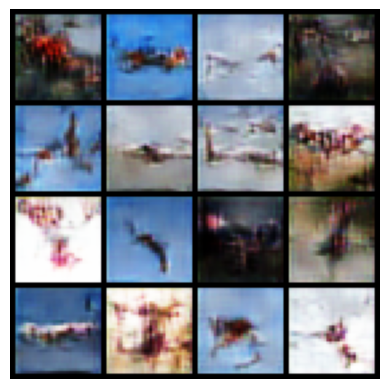

Epoch [31/50]						Batch 100/128 Discriminator Loss: 0.5650 Generator Loss: 1.1587
Epoch [32/50]						Batch 100/128 Discriminator Loss: 0.5829 Generator Loss: 1.7139
Epoch [33/50]						Batch 100/128 Discriminator Loss: 0.4067 Generator Loss: 2.6947
Epoch [34/50]						Batch 100/128 Discriminator Loss: 0.4108 Generator Loss: 1.3513
Epoch [35/50]						Batch 100/128 Discriminator Loss: 0.5210 Generator Loss: 1.0452
Epoch [36/50]						Batch 100/128 Discriminator Loss: 0.7557 Generator Loss: 0.8517
Epoch [37/50]						Batch 100/128 Discriminator Loss: 0.5224 Generator Loss: 1.1611
Epoch [38/50]						Batch 100/128 Discriminator Loss: 0.4302 Generator Loss: 1.3080
Epoch [39/50]						Batch 100/128 Discriminator Loss: 0.4735 Generator Loss: 1.8597
Epoch [40/50]						Batch 100/128 Discriminator Loss: 0.2112 Generator Loss: 2.0894


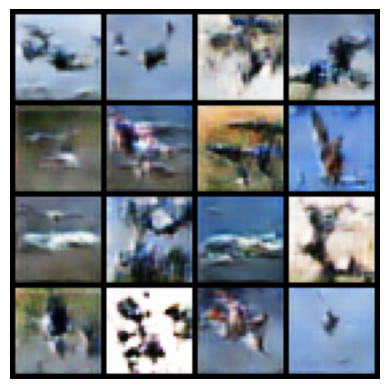

Epoch [41/50]						Batch 100/128 Discriminator Loss: 0.5398 Generator Loss: 1.6311
Epoch [42/50]						Batch 100/128 Discriminator Loss: 0.3134 Generator Loss: 0.9594
Epoch [43/50]						Batch 100/128 Discriminator Loss: 0.4044 Generator Loss: 1.6057
Epoch [44/50]						Batch 100/128 Discriminator Loss: 0.5999 Generator Loss: 2.1832
Epoch [45/50]						Batch 100/128 Discriminator Loss: 0.5401 Generator Loss: 1.1652
Epoch [46/50]						Batch 100/128 Discriminator Loss: 0.5149 Generator Loss: 1.6092
Epoch [47/50]						Batch 100/128 Discriminator Loss: 0.3663 Generator Loss: 1.9609
Epoch [48/50]						Batch 100/128 Discriminator Loss: 0.6094 Generator Loss: 0.5960
Epoch [49/50]						Batch 100/128 Discriminator Loss: 0.4920 Generator Loss: 1.5665
Epoch [50/50]						Batch 100/128 Discriminator Loss: 0.4870 Generator Loss: 1.9131


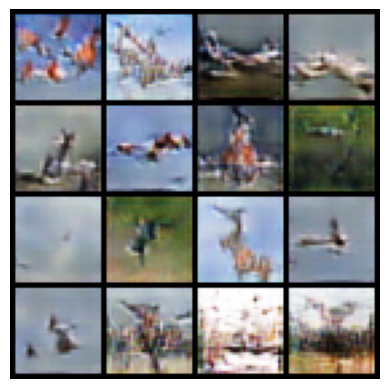

In [41]:
for epoch in range(num_epochs):
	for i, batch in enumerate(dataloader):
	# Convert list to tensor
		real_images = batch[0].to(device) 
		valid = torch.ones(real_images.size(0), 1, device=device)
		fake = torch.zeros(real_images.size(0), 1, device=device)
		# Configure input
		real_images = real_images.to(device)

		# Train Discriminator
		optimizer_Descriminator.zero_grad()
		# Sample noise as generator input
		z = torch.randn(real_images.size(0), latent_dim, device=device)
		fake_images = generator(z)

		# to classify real and fake images
		real_loss = adversarial_loss(discriminator\
									(real_images), valid)
		fake_loss = adversarial_loss(discriminator\
									(fake_images.detach()), fake)
		d_loss = (real_loss + fake_loss) / 2
		d_loss.backward()
		optimizer_Descriminator.step()

		# Train Generator

		optimizer_Generator.zero_grad()
		gen_images = generator(z)
		g_loss = adversarial_loss(discriminator(gen_images), valid)
		g_loss.backward()
		optimizer_Generator.step()

		if (i + 1) % 100 == 0:
			print(
				f"Epoch [{epoch+1}/{num_epochs}]\
						Batch {i+1}/{len(dataloader)} "
				f"Discriminator Loss: {d_loss.item():.4f} "
				f"Generator Loss: {g_loss.item():.4f}"
			)
	# Save generated images
	if (epoch + 1) % 10 == 0:
		with torch.no_grad():
			z = torch.randn(16, latent_dim, device=device)
			generated = generator(z).detach().cpu()
			grid = torchvision.utils.make_grid(generated,\
										nrow=4, normalize=True)
			plt.imshow(np.transpose(grid, (1, 2, 0)))
			plt.axis("off")
			plt.show()
